# Random Forest Classification

## Import relevant libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
data = dataset.iloc[:, [3,4] ]

In [3]:
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## Scale the inputs

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data)

## Plot the data

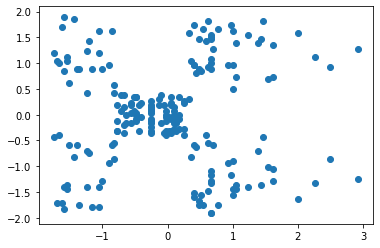

In [5]:
plt.scatter(X[:,0],X[:,1])

plt.show()

## Applying the elbow method to find the optimal number of clusters

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[400.0,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.067795914519664,
 46.82938899894428,
 37.17212373746481,
 32.377243774440345]

## Ploting the results

Text(0, 0.5, 'WCSS')

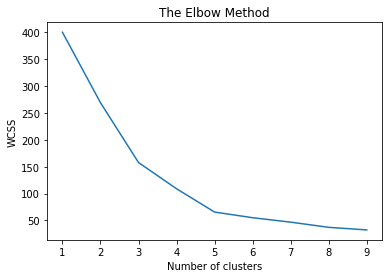

In [7]:
cluster_numbers = range(1,10)
plt.plot(cluster_numbers,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Applying Kmeans

In [8]:
kmeans = KMeans(5)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters

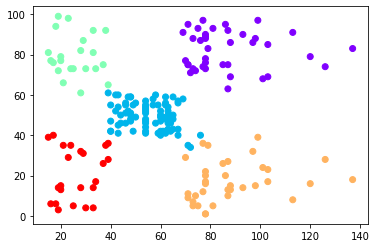

In [9]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.show()